In [25]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
codigo="2192097"
Z = sum([int(i) for i in codigo])
U = Z/3
L1 = 0.05*Z
L2 = L1*1.5
L3= 0.5*L1
Lt=L1+L2+L3
Wmax= 0.005*Z + 0.01*U
P= 0.05*Z
print('L1= '+ str(L1) + ' L2= ' + str(L2) + ' L3= ' + str(L3) + ' L_total= ' + str(Lt) + ' Wmax=' + str(Wmax))

L1= 1.5 L2= 2.25 L3= 0.75 L_total= 4.5 Wmax=0.25


In [27]:
Ay, Ax, Ma, Z, M, N, B = sp.symbols('Ay Ax Ma Z M N B ')
Px=P*np.cos(np.radians(45))
Py=P*np.sin(np.radians(45))
W1=(L1*Wmax/2)
W2=(L2*Wmax)
W3=(L3*Wmax/2)
#print(str(W1)+'-'+str(W2)+'-'+str(W3))

In [28]:
Ma = (Py*Lt)-(W1*2/3*L1)-(W2*(L1+L2/2))-(W3*(L1+L2+L3/3))
Ry=-1*(Py-W1-W2-W3)
Rx=Px
print('Ma= '+ str(Ma) + ' Ry= ' + str(Ry) + ' Rx= ' + str(Rx))

Ma= 2.733908273009196 Ry= -0.21691017177982141 Rx= 1.0606601717798214


In [29]:
#V1=Ry-(Wmax/(2*L1))*Z**2
Va=Ry-(Wmax/(2*L1))*L1**2
#V2=Va-Wmax*M
Vb=V2=Va-Wmax*L2
#V3=Vb+((Wmax/(2*L3))*x**2)-(Wmax*x)
Vc=Vb+((Wmax/(2*L3))*L3**2)-(Wmax*L3)
print('Vc= '+str(Vc)+' Py= '+str(Py)+' Va= '+str(Va)+ ' Vb= '+str(Vb))

Vc= -1.0606601717798214 Py= 1.0606601717798214 Va= -0.4044101717798214 Vb= -0.9669101717798214


In [30]:
# Cortantes
x = sp.symbols('x')
V1 = Ry-(Wmax/(2*L1))*x**2
V2 = Va-Wmax*x
V3= Vb+((Wmax/(2*L3))*x**2)-(Wmax*x)

In [31]:
#Momentos
M1= Ry*x-((Wmax/(6*L1))*x**3)+Ma
MQ= Ry*L1-((Wmax/(6*L1))*L1**3)+Ma
M2= (Va*(x-L1))-((Wmax/2)*(x-L1)**2)+MQ
MW= (Va*L2)-((Wmax/2)*L2**2)+MQ
M3= (Vb*(x-L2))+((Wmax/(6*L3))*(x-L2)**3)-((Wmax/2)*(x-L2)**2)+MW
ME= (Vb*L3)+((Wmax/(6*L3))*L3**3)-((Wmax/2)*L3**2)+MW

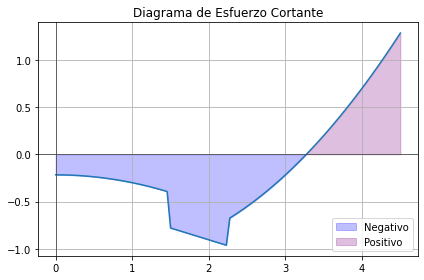

In [32]:
#Cortante
#x = np.arange(0,Lt,0.005)
x = np.linspace(0,Lt,100)

Tramo1 = lambda x: Ry-(Wmax/(2*L1))*x**2
Tramo2 = lambda x: Va-Wmax*x
Tramo3 = lambda x: Vb+((Wmax/(2*L3))*x**2)-(Wmax*x)

y = np.piecewise(x,[x < L1,(x>=L1) & (x<=L2), x >= L2],[Tramo1, Tramo2, Tramo3])
Vmax= np.amax(y)
plt.plot(x,y)
plt.title('Diagrama de Esfuerzo Cortante')
plt.axhline(0, color='#444444',linewidth=0.75)
plt.axvline(0, color='#444444',linewidth=0.75)
plt.fill_between(x,y,where=(y<=0), interpolate=True, alpha=0.25, label='Negativo', color='blue')
plt.fill_between(x,y,where=(y>0),interpolate=True, alpha=0.25, label='Positivo', color='purple')

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

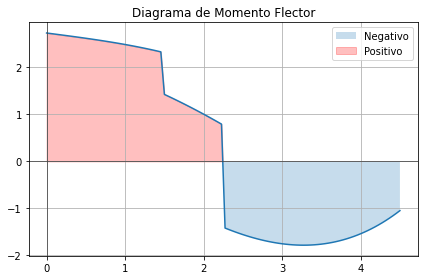

In [33]:
#Momentos
x = np.linspace(0,Lt,100)


Tramo1 = lambda x: Ry*x-((Wmax/(6*L1))*x**3)+Ma
Tramo2 = lambda x: (Va*x)-((Wmax/2)*x**2)+MQ
Tramo3 = lambda x: (Vb*x)+((Wmax/(6*L3))*x**3)-((Wmax/2)*x**2)+MW

y = np.piecewise(x,[x < L1,(x>=L1) & (x<=L2), x >= L2],[Tramo1, Tramo2, Tramo3])
Mmax= np.amax(y)
plt.plot(x,y)
plt.title('Diagrama de Momento Flector')
plt.axhline(0, color='#444444',linewidth=0.75)
plt.axvline(0, color='#444444',linewidth=0.75)
plt.fill_between(x,y,where=(y<=0), interpolate=True, alpha=0.25, label='Negativo')
plt.fill_between(x,y,where=(y>0),interpolate=True, alpha=0.25, label='Positivo', color='red')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [34]:
print('Los valores maximos de Cortante y Momento son: '+' Cortante maximo: '+str(Vmax)+' Momento Max: '+ str(Mmax))

Los valores maximos de Cortante y Momento son:  Cortante maximo: 1.2830898282201786 Momento Max: 2.733908273009196


#Parte Dos del Taller

In [35]:
perfiles=pd.read_excel('T2.xlsx', usecols="B:E", nrows=10, skiprows=3, index_col='perfil')
perfiles

,h [mm],b [mm],t [mm]
perfil,,,
1,25,50,5.0
2,30,60,5.5
3,35,70,6.0
4,40,80,7.0
5,50,100,8.5
6,55,115,9.0
7,60,120,10.0
8,70,140,11.5
9,80,160,13.0


In [36]:
h = perfiles.loc[1, 'h [mm]']
b = perfiles.loc[1, 'b [mm]']
t = perfiles.loc[1, 't [mm]']

In [50]:
resultado=perfiles
Area1=perfiles['b [mm]']*perfiles['t [mm]']
Area2=(perfiles['h [mm]']-perfiles['t [mm]'])*perfiles['t [mm]']
resultado['A [mm^2]']=Area1+Area2

In [51]:
resultado['Centroide [mm]']=((Area1*(perfiles['h [mm]']-perfiles['t [mm]']/2))+(Area2*((perfiles['h [mm]']-perfiles['t [mm]'])/2)))/(resultado['A [mm^2]'])
resultado['Inercia [mm^4]']=(((perfiles['b [mm]']*(perfiles['t [mm]']**3))/12)+Area1*(resultado['Centroide [mm]']-(perfiles['h [mm]']-perfiles['t [mm]']/2))**2)+(((perfiles['t [mm]']*(perfiles['h [mm]']-perfiles['t [mm]'])**3)/12)+Area2*(resultado['Centroide [mm]']-(perfiles['h [mm]']-perfiles['t [mm]'])/2)**2)

In [54]:
resultado['Esfuerzo_C[Mpa]']=((Mmax*10**6)*resultado['Centroide [mm]'])/resultado['Inercia [mm^4]']
resultado['Esfuerzo_T[Mpa]']=abs(((Mmax*10**6)*(h-resultado['Centroide [mm]']))/resultado['Inercia [mm^4]'])
resultado

,h [mm],b [mm],t [mm],A [mm^2],Centroide [mm],Inercia [mm^4],Esfuerzo_C[Mpa],Esfuerzo_T[Mpa]
perfil,,,,,,,,
1,25,50,5.0,350.00,18.928571,1.501488e+04,3446.512709,1105.485209
2,30,60,5.5,464.75,22.900888,2.910029e+04,2151.488132,197.207006
3,35,70,6.0,594.00,26.873737,5.113253e+04,1436.860889,100.183309
4,40,80,7.0,791.00,30.659292,8.866585e+04,945.343625,174.497690
5,50,100,8.5,1202.75,38.417845,2.115530e+05,496.475445,173.399378
6,55,115,9.0,1449.00,42.642857,3.036222e+05,383.969513,158.861758
7,60,120,10.0,1700.00,46.176471,4.318137e+05,292.353456,134.072922
8,70,140,11.5,2282.75,53.935139,7.908459e+05,186.450642,100.027094
9,80,160,13.0,2951.00,61.693833,1.337393e+06,126.114967,75.009791


In [40]:
filtro=resultado['Esfuerzo_C[Mpa]'] <=250
resultado[filtro]

,h [mm],b [mm],t [mm],A [mm^2],Centroide [mm],Inercia [mm^4],Esfuerzo_C[Mpa],Esfuerzo_T[Mpa]
perfil,,,,,,,,
8,70,140,11.5,2282.75,53.935139,7.908459e+05,186.450642,100.027094
9,80,160,13.0,2951.00,61.693833,1.337393e+06,126.114967,75.009791
10,90,180,15.0,3825.00,69.264706,2.186057e+06,86.623246,55.357956


In [41]:
area_minima=resultado.loc[filtro, 'A [mm^2]'].min()
Indice=resultado.loc[filtro, 'A [mm^2]'].idxmin()

In [43]:
perfil_optimo=perfiles.loc[[Indice], :'t [mm]']
perfil_optimo

,h [mm],b [mm],t [mm]
perfil,,,
8,70,140,11.5


In [55]:
from openpyxl import load_workbook
with pd.ExcelWriter ('T2.xlsx', mode='a', engine='openpyxl') as writer:
    #Configurar las hojas
    book= load_workbook('T2.xlsx')
    writer.book=book
    writer.sheets= dict((ws.title,ws) for ws in book.worksheets)
    
    #colocando los dataframes en sus posiciones
    perfil_optimo.to_excel(writer,startrow=18, startcol=6, sheet_name='Hoja2',index=None)
    resultado.to_excel(writer, startrow=2, startcol=12, sheet_name='Hoja2',index=None)
    perfiles.to_excel(writer, startrow=2, startcol=9, sheet_name='Hoja2',index=None)


ValueError: Sheet 'Hoja2' already exists and if_sheet_exists is set to 'error'.